In [124]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta
import os

today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

df = yf.download('AMZN',
                      start=start_date,
                      end=end_date,
                      progress=False)
df["Date"] = df.index
df = df[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
print(df.tail())

           Date        Open        High         Low       Close   Adj Close  \
3439 2024-06-13  186.089996  187.669998  182.669998  183.830002  183.830002   
3440 2024-06-14  183.080002  183.720001  182.229996  183.660004  183.660004   
3441 2024-06-17  182.520004  185.000000  181.220001  184.059998  184.059998   
3442 2024-06-18  183.740005  184.289993  181.429993  182.809998  182.809998   
3443 2024-06-20  182.910004  186.509995  182.720001  186.100006  186.100006   

        Volume  
3439  39721500  
3440  25456400  
3441  35601900  
3442  36659200  
3443  43977300  


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3444 entries, 0 to 3443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3444 non-null   datetime64[ns]
 1   Open       3444 non-null   float64       
 2   High       3444 non-null   float64       
 3   Low        3444 non-null   float64       
 4   Close      3444 non-null   float64       
 5   Adj Close  3444 non-null   float64       
 6   Volume     3444 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 188.5 KB


In [126]:

df.to_csv('data.csv')


In [127]:
df_train=df.iloc[:-100]
df_test=df.iloc[-100:]


In [128]:
trainset = df_train.iloc[:,1:2].values
display(trainset[0:5])

array([[7.83449984],
       [7.7579999 ],
       [7.921     ],
       [8.25      ],
       [8.0340004 ]])

In [129]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [130]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))

[[0.00042632]
 [0.        ]
 [0.00090837]
 [0.00274183]
 [0.0015381 ]]
3344


In [131]:
x_train = []
y_train = []

In [132]:
for i in range(60,len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(3284, 60) (3284,)


In [133]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print('(samples, time steps, features) =',x_train.shape)

(samples, time steps, features) = (3284, 60, 1)


In [134]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [135]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

regressor.fit(x_train,y_train,epochs =30, batch_size = 32)

Epoch 1/30
103/103 [==============================] - 11s 17ms/step - loss: 0.0116
Epoch 2/30
103/103 [==============================] - 2s 17ms/step - loss: 0.0033
Epoch 3/30
103/103 [==============================] - 2s 17ms/step - loss: 0.0030
Epoch 4/30
103/103 [==============================] - 2s 17ms/step - loss: 0.0029
Epoch 5/30
103/103 [==============================] - 2s 16ms/step - loss: 0.0028
Epoch 6/30
103/103 [==============================] - 2s 18ms/step - loss: 0.0024
Epoch 7/30
103/103 [==============================] - 2s 24ms/step - loss: 0.0028
Epoch 8/30
103/103 [==============================] - 2s 18ms/step - loss: 0.0022
Epoch 9/30
103/103 [==============================] - 2s 17ms/step - loss: 0.0019
Epoch 10/30
103/103 [==============================] - 2s 17ms/step - loss: 0.0023
Epoch 11/30
103/103 [==============================] - 2s 17ms/step - loss: 0.0019
Epoch 12/30
103/103 [==============================] - 2s 17ms/step - loss: 0.0018
Epoch 13/30


In [136]:
# Python ile geçmiş Finans verilerini içe aktarma ve biçimlendir.
import csv
from datetime import datetime

timesteps = []
df_price = []
with open("/content/data.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # ilk satırı atla (bu, sütun başlıklarından kurtulur)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # tarihleri tarih olarak al (dizgi olarak değil)
    df_price.append(float(line[2])) # kapanış fiyatını kayan nokta olarak alın

timesteps[:10], df_price[:10]

([datetime.datetime(2010, 10, 13, 0, 0),
  datetime.datetime(2010, 10, 14, 0, 0),
  datetime.datetime(2010, 10, 15, 0, 0),
  datetime.datetime(2010, 10, 18, 0, 0),
  datetime.datetime(2010, 10, 19, 0, 0),
  datetime.datetime(2010, 10, 20, 0, 0),
  datetime.datetime(2010, 10, 21, 0, 0),
  datetime.datetime(2010, 10, 22, 0, 0),
  datetime.datetime(2010, 10, 25, 0, 0),
  datetime.datetime(2010, 10, 26, 0, 0)],
 [7.834499835968018,
  7.757999897003174,
  7.921000003814697,
  8.25,
  8.034000396728516,
  7.939000129699707,
  8.133500099182129,
  8.1225004196167,
  8.578499794006348,
  8.378499984741211])

In [137]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2010-10-13,7.758500
1,2010-10-14,7.776500
2,2010-10-15,8.232000
3,2010-10-18,8.178000
4,2010-10-19,7.933500
...,...,...
3439,2024-06-13,183.830002
3440,2024-06-14,183.660004
3441,2024-06-17,184.059998
3442,2024-06-18,182.809998


In [138]:
df.head()

,Date,Close
0,2010-10-13,7.7585
1,2010-10-14,7.7765
2,2010-10-15,8.2320
3,2010-10-18,8.1780
4,2010-10-19,7.9335


In [139]:
df.set_index('Date',inplace = True)

In [140]:


train = df.iloc[:156]
test = df.iloc[156:]


In [141]:
df = df.astype('float32')
df

,Close
Date,
2010-10-13,7.758500
2010-10-14,7.776500
2010-10-15,8.232000
2010-10-18,8.178000
2010-10-19,7.933500
...,...
2024-06-13,183.830002
2024-06-14,183.660004
2024-06-17,184.059998


In [142]:
timesteps = df.index.to_numpy()
prices = df["Close"].to_numpy()

timesteps[:10], prices[:10]

(array(['2010-10-13T00:00:00.000000000', '2010-10-14T00:00:00.000000000',
        '2010-10-15T00:00:00.000000000', '2010-10-18T00:00:00.000000000',
        '2010-10-19T00:00:00.000000000', '2010-10-20T00:00:00.000000000',
        '2010-10-21T00:00:00.000000000', '2010-10-22T00:00:00.000000000',
        '2010-10-25T00:00:00.000000000', '2010-10-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([7.7585, 7.7765, 8.232 , 8.178 , 7.9335, 7.9335, 8.2485, 8.4565,
        8.45  , 8.4975], dtype=float32))

In [143]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2755, 689, 2755, 689)

In [144]:
import matplotlib.pyplot as plt

# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel(" Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

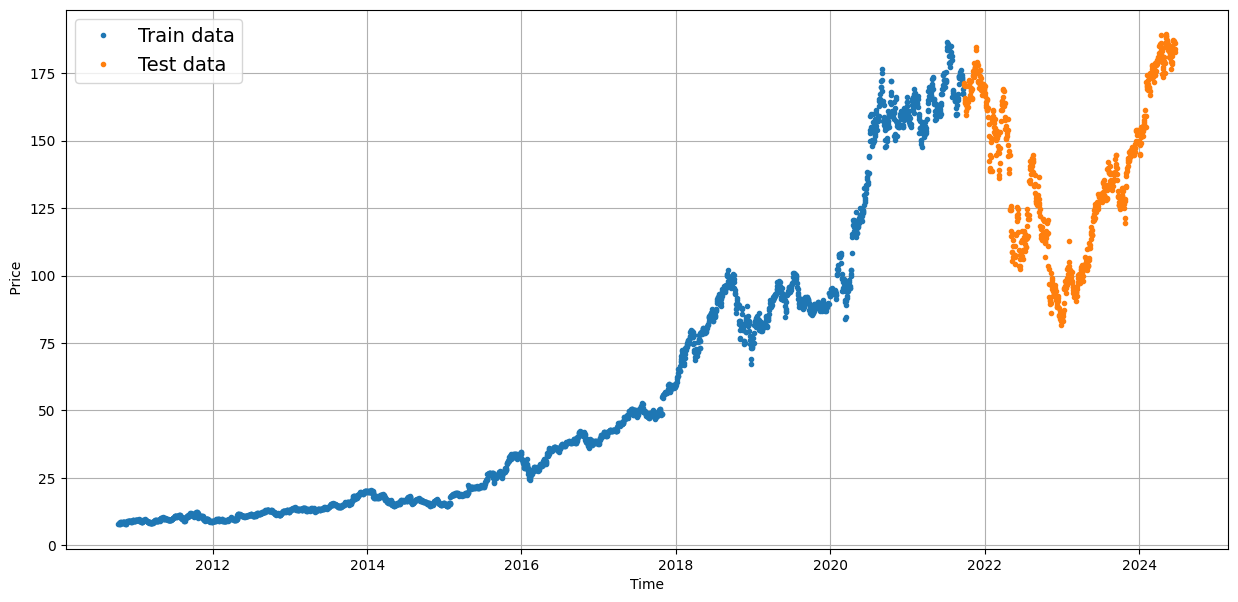

In [145]:
# Test out plotting function
plt.figure(figsize=(15, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [247]:
# Pencere ve ufuk boyutu için global değişkenler ayarlayalım
HORIZON = 1 # gelecek 1 günü tahmin et
WINDOW_SIZE = 60 # tahminde bulunmak için geçen 60 günün  verilerini kullanın

In [210]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]

In [211]:
# verilerimizle ne yapmak istiyoruz
print(f"Kullanmak istiyoruz: {df_price[:7]} bunu tahmin etmek: {df_price[7]}")

Kullanmak istiyoruz: [7.834499835968018, 7.757999897003174, 7.921000003814697, 8.25, 8.034000396728516, 7.939000129699707, 8.133500099182129] bunu tahmin etmek: 8.1225004196167


In [212]:
# Pencere etiketleme fonksiyonunu test edin
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


In [213]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    1D dizisini, window_size ve horizon boyutunda etiketlenmiş ardışık pencerelerden oluşan 2D diziye dönüştürür.
    """
    # 1. Belirli window_size bir pencere oluşturun (etiketleme için horizon ekleyin)
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    # window_step: Pencerenin her bir adımı için indeksleri içeren bir dizi oluşturur. `np.expand_dims` kullanarak bu diziyi iki boyutlu hale getirir.

    # 2. Birden fazla pencere adımı içeren 2D bir dizi oluşturun (0 indekslemeyi hesaba katmak için 1 çıkarın)
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    # window_indexes: `window_step` dizisini giriş dizisinin her bir adımıyla kaydırarak pencere indekslerini oluşturur. Bu, her bir pencerenin başlangıç noktalarını belirler.

    # 3. Hedef diziden (bir zaman serisi) birden fazla pencere adımı içeren 2D diziyi indeksleyin
    windowed_array = x[window_indexes]
    # windowed_array: Giriş dizisinden pencere indekslerini kullanarak veriyi çıkarır ve 2D bir pencere dizisi oluşturur.

    # 4. Etiketlenmiş pencereleri alın
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    return windows, labels
    # windows, labels: `get_labelled_windows` fonksiyonunu kullanarak pencereleri ve etiketlerini oluşturur ve döndürür.


In [214]:
# Prices dizisinden tam pencereler ve etiketler oluşturun
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
print(f"Pencere sayısı: {len(full_windows)}, Etiket sayısı: {len(full_labels)}")


Pencere sayısı: 3384, Etiket sayısı: 3384


In [215]:
# İlk 3 pencere/etiketi görüntüleyin
for i in range(3):
    print(f"Pencere: {full_windows[i]} -> Etiket: {full_labels[i]}")


Pencere: [7.7585 7.7765 8.232  8.178  7.9335 7.9335 8.2485 8.4565 8.45   8.4975
 8.3755 8.342  8.2615 8.129  8.2305 8.4235 8.4465 8.5385 8.5995 8.5135
 8.6665 8.5185 8.284  7.945  7.889  7.9175 8.2085 8.241  8.5195 8.41
 8.8625 8.86   8.9745 8.77   8.8275 8.8265 8.784  8.9025 8.8385 8.8145
 8.7425 8.781  8.7125 8.697  8.7785 8.902  8.879  9.1645 9.2375 9.238
 9.1295 9.107  9.0545 9.1685 9.1375 9.     9.211  9.2505 9.371  9.293 ] -> Etiket: [9.2745]
Pencere: [7.7765 8.232  8.178  7.9335 7.9335 8.2485 8.4565 8.45   8.4975 8.3755
 8.342  8.2615 8.129  8.2305 8.4235 8.4465 8.5385 8.5995 8.5135 8.6665
 8.5185 8.284  7.945  7.889  7.9175 8.2085 8.241  8.5195 8.41   8.8625
 8.86   8.9745 8.77   8.8275 8.8265 8.784  8.9025 8.8385 8.8145 8.7425
 8.781  8.7125 8.697  8.7785 8.902  8.879  9.1645 9.2375 9.238  9.1295
 9.107  9.0545 9.1685 9.1375 9.     9.211  9.2505 9.371  9.293  9.2745] -> Etiket: [9.234]
Pencere: [8.232  8.178  7.9335 7.9335 8.2485 8.4565 8.45   8.4975 8.3755 8.342
 8.2615 8.129

In [216]:
# Pencereleri ve etiketleri eğitim ve test setlerine ayırmak için bir fonksiyon oluşturun
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Eşleşen pencere ve etiket çiftlerini eğitim ve test setlerine ayırır.
    """
    split_size = int(len(windows) * (1 - test_split))  # Bu, varsayılan olarak %80 eğitim/%20 test olarak ayarlanır
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels
    # train_windows, train_labels, test_windows, test_labels: Pencere ve etiketleri belirtilen oranda (varsayılan %80 eğitim, %20 test) eğitim ve test setlerine ayırır ve döndürür.


In [217]:
# Eğitim ve test pencereleri oluşturun
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
print(f"Eğitim pencereleri: {len(train_windows)}, Test pencereleri: {len(test_windows)}")
print(f"Eğitim etiketleri: {len(train_labels)}, Test etiketleri: {len(test_labels)}")


Eğitim pencereleri: 2707, Test pencereleri: 677
Eğitim etiketleri: 2707, Test etiketleri: 677


In [219]:
# İlk 5 eğitim penceresi ve etiketini incelemek için yazdırın
print(train_windows[:5], train_labels[:5])


[[7.7585 7.7765 8.232  8.178  7.9335 7.9335 8.2485 8.4565 8.45   8.4975
  8.3755 8.342  8.2615 8.129  8.2305 8.4235 8.4465 8.5385 8.5995 8.5135
  8.6665 8.5185 8.284  7.945  7.889  7.9175 8.2085 8.241  8.5195 8.41
  8.8625 8.86   8.9745 8.77   8.8275 8.8265 8.784  8.9025 8.8385 8.8145
  8.7425 8.781  8.7125 8.697  8.7785 8.902  8.879  9.1645 9.2375 9.238
  9.1295 9.107  9.0545 9.1685 9.1375 9.     9.211  9.2505 9.371  9.293 ]
 [7.7765 8.232  8.178  7.9335 7.9335 8.2485 8.4565 8.45   8.4975 8.3755
  8.342  8.2615 8.129  8.2305 8.4235 8.4465 8.5385 8.5995 8.5135 8.6665
  8.5185 8.284  7.945  7.889  7.9175 8.2085 8.241  8.5195 8.41   8.8625
  8.86   8.9745 8.77   8.8275 8.8265 8.784  8.9025 8.8385 8.8145 8.7425
  8.781  8.7125 8.697  8.7785 8.902  8.879  9.1645 9.2375 9.238  9.1295
  9.107  9.0545 9.1685 9.1375 9.     9.211  9.2505 9.371  9.293  9.2745]
 [8.232  8.178  7.9335 7.9335 8.2485 8.4565 8.45   8.4975 8.3755 8.342
  8.2615 8.129  8.2305 8.4235 8.4465 8.5385 8.5995 8.5135 8.6665 8

In [220]:
test_windows[:5], test_labels[:5]

(array([[178.6815, 177.4795, 178.6595, 179.26  , 181.9015, 182.832 ,
         184.991 , 181.3195, 181.516 , 179.996 , 166.3795, 166.574 ,
         168.312 , 167.736 , 168.7995, 167.247 , 167.0935, 166.034 ,
         164.6055, 165.175 , 164.6985, 164.9495, 162.098 , 160.061 ,
         159.3875, 159.9975, 163.2935, 165.289 , 164.959 , 165.8   ,
         167.4815, 171.0785, 173.5395, 173.95  , 173.156 , 173.9025,
         175.4645, 176.275 , 174.208 , 173.4575, 172.8585, 172.5   ,
         173.7895, 174.412 , 173.126 , 167.7865, 167.1815, 169.0025,
         170.8   , 171.276 , 170.29  , 165.798 , 165.056 , 164.252 ,
         164.163 , 159.489 , 161.05  , 163.1005, 165.1215, 164.431 ],
        [177.4795, 178.6595, 179.26  , 181.9015, 182.832 , 184.991 ,
         181.3195, 181.516 , 179.996 , 166.3795, 166.574 , 168.312 ,
         167.736 , 168.7995, 167.247 , 167.0935, 166.034 , 164.6055,
         165.175 , 164.6985, 164.9495, 162.098 , 160.061 , 159.3875,
         159.9975, 163.2935, 165.

In [221]:
# Belirli bir dosya adıyla ModelCheckpoint callback'ini uygulamak için bir fonksiyon oluşturun
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor="val_loss",
                                              verbose=0,  # Sadece sınırlı miktarda metin çıktısı
                                              save_best_only=True)


In [222]:
from keras.models import Sequential
from tensorflow.keras import layers
tf.random.set_seed(42)

# Functional API ile bir LSTM modeli oluşturalım
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(300, activation="relu")(x)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)
x = layers.Dense(80, activation="relu")(x)

x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_1 = tf.keras.Model(inputs=inputs, outputs=output, name="model_1_LSTM")


# Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
history = model_1.fit(train_windows,
            train_labels,
            epochs=50,
            verbose=1,
            batch_size=150,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/50
19/19 [==============================] - 8s 175ms/step - loss: 11.9941 - val_loss: 13.0124
Epoch 2/50
19/19 [==============================] - 0s 9ms/step - loss: 3.8530 - val_loss: 13.4704
Epoch 3/50
19/19 [==============================] - 2s 116ms/step - loss: 3.1538 - val_loss: 11.3296
Epoch 4/50
19/19 [==============================] - 2s 115ms/step - loss: 3.0822 - val_loss: 9.3620
Epoch 5/50
19/19 [==============================] - 0s 9ms/step - loss: 2.8523 - val_loss: 9.6215
Epoch 6/50
19/19 [==============================] - 2s 131ms/step - loss: 2.8349 - val_loss: 7.3546
Epoch 7/50
19/19 [==============================] - 3s 159ms/step - loss: 2.3957 - val_loss: 6.7861
Epoch 8/50
19/19 [==============================] - 0s 9ms/step - loss: 2.4839 - val_loss: 7.4773
Epoch 9/50
19/19 [==============================] - 0s 9ms/step - loss: 2.7285 - val_loss: 7.0899
Epoch 10/50
19/19 [==============================] - 0s 8ms/step - loss: 2.0111 - val_loss: 8.3305
Epoch

In [177]:
# En iyi model 5 versiyonunu yükleyin ve test verileri üzerinde değerlendirin
model_1 = tf.keras.models.load_model("model_experiments/model_1_LSTM")
model_1.evaluate(test_windows, test_labels)


22/22 [==============================] - 0s 3ms/step - loss: 3.3774


3.3774054050445557

In [224]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  MASE (Mevsimsellik Olmayan Veriler için) uygulaması.
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  # y_true ve y_pred arasındaki Ortalama Mutlak Hata (MAE) hesaplanır.

  # Naive tahminin MAE'sini bulun (mevsimsellik yok)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  # Mevsimsellik olmadan (bir gün kayma ile) naive tahminin MAE'si hesaplanır.

  return mae / mae_naive_no_season
  # MASE, naive tahminin MAE'sine bölünerek hesaplanır.


In [225]:
# Model tahminlerini ve doğruluk değerlerini almak ve değerlendirme metriklerini döndürmek için bir işlev oluşturun
def evaluate_preds(y_true, y_pred):
  # Metriğin hesaplanması için float32 veri tipine dönüştürün
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Çeşitli değerlendirme metriklerini hesaplayın
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}
  # Hesaplanan değerlendirme metriklerini bir sözlük olarak döndürür.


In [226]:
def make_preds(model, input_data):
  """
  Modeli kullanarak input_data için tahminler yapar.
  """
  forecast = model.predict(input_data)
  # Modelin girdi verisi üzerinde tahminler yapmasını sağlar.
  return tf.squeeze(forecast) # Tahminleri 1D dizi olarak döndürür.
  # Tahminlerin tek boyutlu bir dizi olarak döndürülmesini sağlar.


In [227]:
# LSTM modelimizle tahmin yapın
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:5]
# make_preds fonksiyonunu kullanarak model_1 ve test_windows verileri ile tahminler yapar

22/22 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([165.21928, 164.92227, 164.35593, 164.68562, 165.347  ],
      dtype=float32)>

In [228]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results


{'mae': 4.0099626,
 'mse': 29.044304,
 'rmse': 5.3892765,
 'mape': 3.1127763,
 'mase': 1.7436674}